# Embeddings with the Schelling Model

A series of experiements with using embeddings to define agents in a simple schelling model.

See [schelling_embeddings2.py](schelling_embeddings2.py) for the Schelling model code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Import the SchellingModel from your existing code file
from schelling_embeddings2 import household_descriptions
from schelling_embeddings2 import SchellingModel

## Household Embedding similarity

Explore the embeddings

These are the household descriptions:

In [2]:
pd.DataFrame(household_descriptions)

,0
0,"A dual-income, child-free couple in their 30s ..."
1,"A high-income, couple without children in thei..."
2,A single mother of two in a rented flat works ...
3,A retired married couple in a suburban bungalo...
4,A student house-share of four undergraduates l...
5,"A middle-aged, married couple with three teena..."
6,A cohabiting same-sex couple in their 40s livi...
7,"A large, multi-generational family shares a te..."
8,A young single professional in a high-rise fla...
9,"A rural, self-employed farming couple with no ..."


Look at the similarity of the household embeddings.


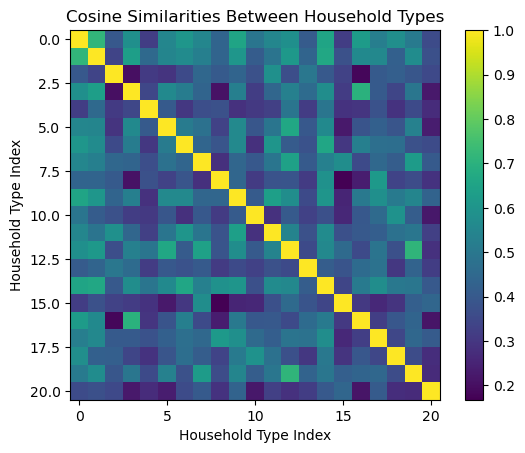

In [3]:
# Create a minimal model instance. Set grid_size=1, num_agents=1, max_iters=0
# so it doesn't run the main loop, but still loads embeddings.
model = SchellingModel(
    descriptions=household_descriptions,
    grid_size=1,
    num_agents=1,
    similarity_threshold=0.85,
    max_iters=0
)

# Retrieve the 10 household embeddings from the model
embeddings = model.description_embeddings

# Compute the 10×10 similarity matrix
sim_matrix = cosine_similarity(embeddings)

# Plot the similarity matrix
plt.imshow(sim_matrix)  # By default uses a color scale
plt.colorbar()
plt.title("Cosine Similarities Between Household Types")
plt.xlabel("Household Type Index")
plt.ylabel("Household Type Index")
plt.show()

Show the most- and least-similar pairs of households

In [4]:
# Create a list of (type_i, type_j, similarity) for all unique pairs
pairs = []
for i in range(len(household_descriptions)):
    for j in range(i+1, len(household_descriptions)):
        pairs.append((i, j, sim_matrix[i][j]))

# Sort by similarity
pairs.sort(key=lambda x: x[2], reverse=True)

# Take the top 5 most similar
top_5 = pairs[:5]
# Take the bottom 5 least similar
bottom_5 = pairs[-5:]

# Convert to DataFrame
columns = ["Type1 Index", "Type2 Index", "Similarity", "Type1 Description", "Type2 Description"]
rows = []
for (i, j, sim) in top_5:
    rows.append((i, j, sim, household_descriptions[i], household_descriptions[j]))
for (i, j, sim) in bottom_5:
    rows.append((i, j, sim, household_descriptions[i], household_descriptions[j]))

df = pd.DataFrame(rows, columns=columns)

# Show the table
df

,Type1 Index,Type2 Index,Similarity,Type1 Description,Type2 Description
0,0,1,0.716481,"A dual-income, child-free couple in their 30s ...","A high-income, couple without children in thei..."
1,12,19,0.713502,A wealthy family with two kids in private scho...,A traditional nuclear family with two children...
2,3,16,0.699161,A retired married couple in a suburban bungalo...,An older lesbian couple who recently retired t...
3,1,14,0.668321,"A high-income, couple without children in thei...",A young professional couple renting in a trend...
4,5,12,0.663109,"A middle-aged, married couple with three teena...",A wealthy family with two kids in private scho...
5,16,20,0.215539,An older lesbian couple who recently retired t...,A group of migrant agricultural workers sharin...
6,3,8,0.208918,A retired married couple in a suburban bungalo...,A young single professional in a high-rise fla...
7,2,3,0.201271,A single mother of two in a rented flat works ...,A retired married couple in a suburban bungalo...
8,2,16,0.182851,A single mother of two in a rented flat works ...,An older lesbian couple who recently retired t...
9,8,15,0.167917,A young single professional in a high-rise fla...,A recently arrived refugee family of five livi...


## Agent locations

Visualise the changing locations of the agents

Iteration 0: 116 happy agents
Iteration 1: 151 happy agents
Iteration 2: 178 happy agents
Iteration 3: 182 happy agents
Iteration 4: 178 happy agents
Iteration 5: 185 happy agents
Iteration 6: 196 happy agents
Iteration 7: 207 happy agents
Iteration 8: 227 happy agents
Iteration 9: 226 happy agents
Iteration 10: 231 happy agents
Iteration 11: 235 happy agents
Iteration 12: 238 happy agents
Iteration 13: 244 happy agents
Iteration 14: 251 happy agents
Iteration 15: 260 happy agents
Iteration 16: 264 happy agents
Iteration 17: 257 happy agents
Iteration 18: 260 happy agents
Iteration 19: 264 happy agents
Iteration 20: 265 happy agents
Iteration 21: 267 happy agents
Iteration 22: 272 happy agents
Iteration 23: 274 happy agents
Iteration 24: 279 happy agents
Iteration 25: 284 happy agents
Iteration 26: 285 happy agents
Iteration 27: 285 happy agents
Iteration 28: 284 happy agents
Iteration 29: 284 happy agents
Iteration 30: 287 happy agents
Iteration 31: 291 happy agents
Iteration 32: 291 

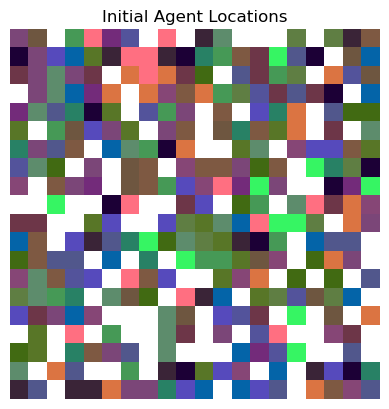

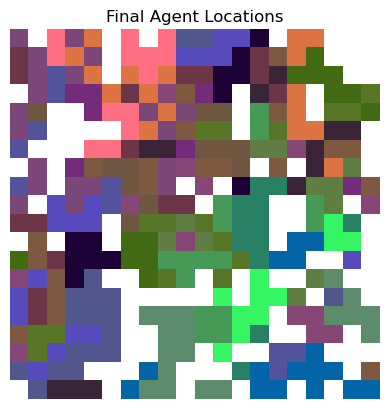

In [5]:

# --- Step 2: Create and run the model
model = SchellingModel(household_descriptions,
                           grid_size=20,
                           num_agents=300,
                           similarity_threshold=0.50,
                           max_iters=50)

# Save initial positions before running the simulation
initial_positions = [(agent.pos, agent.desc_idx) for agent in model.agents]

# Run the simulation (updates agent positions)
model.run(do_plots=False)

# Save final positions
final_positions = [(agent.pos, agent.desc_idx) for agent in model.agents]

# --- Step 3: Plotting function
def plot_agent_positions(agent_data, title, rgb_map, grid_size=20):
    img = np.ones((grid_size, grid_size, 3))  # white background
    for (x, y), desc_idx in agent_data:
        rgb = rgb_map[desc_idx]
        scaled = (rgb - rgb_map.min()) / (rgb_map.max() - rgb_map.min())
        img[x, y] = scaled
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.savefig(f"{title.replace(" ", "_")}.pdf", bbox_inches='tight', dpi=128)
    plt.show()

# --- Step 4: Show both grids
plot_agent_positions(initial_positions, "Initial Agent Locations", model.rgb_map)
plot_agent_positions(final_positions, "Final Agent Locations", model.rgb_map)


/var/folders/bx/3j5z8qc50wl1tcff6xvbf2zh0000gs/T/ipykernel_47232/2950375456.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


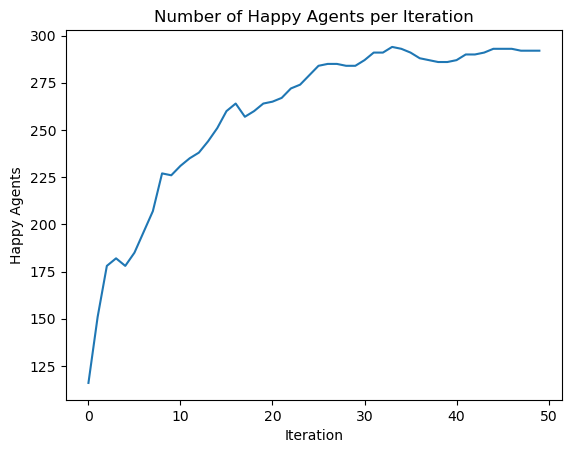

In [6]:
# Plot the happiness graph too
fig = model.plot_happiness(return_fig=True)
fig.savefig("Happiness.pdf", bbox_inches='tight', dpi=128)
fig.show()